In [70]:
%load_ext autoreload
%autoreload 2

from keras.layers import merge
from src.models.data import *
from src.models.model import *
import rasterio.plot as rioplot

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
data_gen_args = dict(
                    rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    rescale=1.0/(255),
                    data_format="channels_last"
 )
myGene = trainGenerator(2,'../data/train','sat','map',
                        data_gen_args,save_to_dir = None,image_color_mode="rgba", target_size=(1024,1024))

Found 105 images belonging to 1 classes.
Found 105 images belonging to 1 classes.
(1024, 1024, 4)


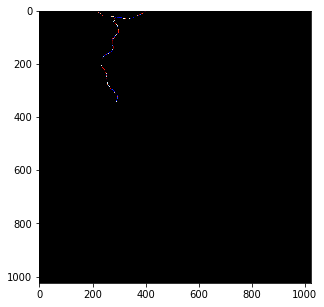

In [72]:
i = 1
n=1
for  img, label in myGene:
    plt.figure(figsize=(5,5))
    print(img[0].shape)
    image2 = img.astype(np.uint8) 
    drop_ir = np.delete(image2[0],3, axis=2)
    plt.imshow(drop_ir)

    l = label[0].reshape(1024,1024)
    masked = np.ma.masked_where(l == 255, l)
    if np.any(masked):
        plt.imshow(masked, cmap="flag")

    i+=1
    if (i>=n):
       break 


In [73]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=5,callbacks=[model_checkpoint])

<module 'keras.layers.merge' from '/Users/kprakash/.pyenv/versions/3.6.5/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/merge.py'>


/Users/kprakash/Projects/roaddetection/src/models/model.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=conv10)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 1024, 1024, 4 0                                            
__________________________________________________________________________________________________
conv2d_226 (Conv2D)             (None, 1024, 1024, 6 2368        input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_227 (Conv2D)             (None, 1024, 1024, 6 36928       conv2d_226[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_69 (MaxPooling2D) (None, 512, 512, 64) 0           conv2d_227[0][0]                 
__________________________________________________________________________________________________
conv2d_228

KeyboardInterrupt: 